# DATA PREPOCESSING

In [826]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Handle Missing Values

In [827]:
# Load saved data from EDA
path = "loan_data.csv"

df = pd.read_csv(path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_rating,loan_status_label
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.001808,360.0,1.0,Urban,Y,High,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,Low,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,Low,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,Low,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,High,1


In [828]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
income_rating        0
loan_status_label    0
dtype: int64

- There are no missing values in the dataset, as expected from the EDA phase.

In [829]:
# Drop irrelevant columns
df = df.drop(columns=['Loan_ID', 'loan_status_label'])

### We proceed to handling outliers found from EDA.

In [830]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols

for col in numeric_cols:
    print(f'{col} = "{df[col].skew():.3f}" skewness value')

Dependents = "0.963" skewness value
ApplicantIncome = "6.868" skewness value
CoapplicantIncome = "7.421" skewness value
LoanAmount = "2.531" skewness value
Loan_Amount_Term = "-2.425" skewness value
Credit_History = "-2.194" skewness value


### handling skewness for ApplicantIncome, CoapplicantIncome, LoanAmount as suggested from EDA

In [831]:
df["ApplicantIncome"] = np.log1p(df["ApplicantIncome"] )
df["CoapplicantIncome"] = np.log1p(df["CoapplicantIncome"] )
df["LoanAmount"] = np.log1p(df["LoanAmount"] )



In [832]:
# def handle_outliers(df, skew_threshold=1.0):
#     df = df.copy()
#     numeric_cols = df.select_dtypes(include=[np.number]).columns

#     for col in numeric_cols:
#         # Skip binary or constant columns
#         if df[col].nunique() <= 2:
#             continue

#         # IQR capping (outlier handling)
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower = Q1 - 1.5 * IQR
#         upper = Q3 + 1.5 * IQR
        
#         df[col] = np.where(df[col] < lower, lower,
#                            np.where(df[col] > upper, upper, df[col]))

#         # Check skew
#         skew = df[col].skew()

#         # Apply transformations
#         if skew > skew_threshold:
#             # Positive skew → log transform
#             df[col] = np.log1p(df[col])

       

#     return df


In [833]:
# clean_df = handle_outliers(df)
# df = clean_df.copy()

In [834]:
for col in numeric_cols:
    print(f'{col} = "{df[col].skew():.3f}" skewness value')

Dependents = "0.963" skewness value
ApplicantIncome = "0.429" skewness value
CoapplicantIncome = "-0.177" skewness value
LoanAmount = "-0.250" skewness value
Loan_Amount_Term = "-2.425" skewness value
Credit_History = "-2.194" skewness value


In [835]:
# # feature scaling
# from sklearn.preprocessing import StandardScaler
# numerical = df.select_dtypes(include=["number"]).columns
# scaler = StandardScaler()
# df[numerical] = scaler.fit_transform(df[numerical])

# df



## Encoding Categorical Variables

In [836]:
# # categorical variables encoding pipeline norminal
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# df.head()


In [837]:
# encoding categrical variables
from sklearn.preprocessing import LabelEncoder

# categorical variables encoding pipeline ordinal
categorical_cols = df.drop(columns="Property_Area").select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Onehot encoding

df = pd.get_dummies(df, "Property_Area", drop_first=True)
    
df.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,income_rating,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,8.674197,0.000000,4.990445,360.0,1.0,1,0,False,True
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0,1,False,False
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,1,1,False,True
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,1,1,False,True
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,1,0,False,True


In [838]:
categorical_cols

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status',
       'income_rating'],
      dtype='object')

In [839]:
# Identify high-cardinality categorical columns BEFORE one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
target_col = 'Loan_Status_1'

high_card_cols = [col for col in categorical_cols if df[col].nunique() > 10]

for col in high_card_cols:
    target_means = df.groupby(col)[target_col].mean()
    df[col] = df[col].map(target_means)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,income_rating,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,8.674197,0.000000,4.990445,360.0,1.0,1,0,False,True
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0,1,False,False
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,1,1,False,True
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,1,1,False,True
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,1,0,False,True


## Feature Engineering 


In [840]:
# feature engineering
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Loan_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,income_rating,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Loan_Income_Ratio,EMI
0,1,0,0,0,0,8.674197,0.000000,4.990445,360.0,1.0,1,0,False,True,8.674197,0.575321,0.013862
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0,1,False,False,15.749530,0.308569,0.013499
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,1,1,False,True,8.006701,0.525147,0.011680
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,1,1,False,True,15.623087,0.306968,0.013322
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,1,0,False,True,8.699681,0.569656,0.013766


In [841]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'income_rating',
       'Total_Income', 'Loan_Income_Ratio', 'EMI'],
      dtype='object')

## Feature Scaling 

In [842]:
numeric_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'income_rating',
       'Total_Income', 'Loan_Income_Ratio', 'EMI'],
      dtype='object')

In [843]:
df.dtypes

Gender                       int64
Married                      int64
Dependents                   int64
Education                    int64
Self_Employed                int64
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
income_rating                int64
Property_Area_Semiurban       bool
Property_Area_Urban           bool
Total_Income               float64
Loan_Income_Ratio          float64
EMI                        float64
dtype: object

In [844]:
numeric_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'income_rating',
       'Total_Income', 'Loan_Income_Ratio', 'EMI'],
      dtype='object')

In [845]:
# feature scaling
from sklearn.preprocessing import StandardScaler
numerical = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Total_Income', 'Loan_Income_Ratio', 'EMI']
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

df



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,income_rating,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Loan_Income_Ratio,EMI
0,1,0,-0.759763,0,0,0.530975,-1.110431,0.248143,0.281358,0.388075,1,0,False,True,-1.073712,1.201291,-0.128598
1,1,1,0.231910,0,0,0.148033,0.779247,-0.015422,0.281358,0.388075,0,1,False,False,0.843316,-0.867826,-0.148280
2,1,1,-0.759763,0,1,-0.517176,-1.110431,-1.337197,0.281358,0.388075,1,1,False,True,-1.254567,0.812106,-0.246984
3,1,1,-0.759763,1,0,-0.752100,0.894600,-0.144593,0.281358,0.388075,1,1,False,True,0.809057,-0.880241,-0.157926
4,1,0,-0.759763,0,0,0.570993,-1.110431,0.178298,0.281358,0.388075,1,0,False,True,-1.066808,1.157353,-0.133814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,0,0,-0.759763,0,0,-0.570393,-1.110431,-1.191983,0.281358,0.388075,1,1,False,False,-1.263750,0.899444,-0.236140
569,1,1,2.215256,0,0,-0.024507,-1.110431,-2.328086,-2.482383,0.388075,1,1,False,False,-1.169559,0.200661,0.238527
570,1,1,0.231910,0,0,1.036734,0.305639,1.351552,0.281358,0.388075,1,0,False,True,0.499635,-0.295262,-0.046201
571,1,1,1.223583,0,0,0.938617,-1.110431,0.744469,0.281358,0.388075,1,0,False,True,-1.003375,1.285202,-0.091535


In [846]:
df.std()

Gender                     0.388630
Married                    0.477633
Dependents                 1.000874
Education                  0.410945
Self_Employed              0.337575
ApplicantIncome            1.000874
CoapplicantIncome          1.000874
LoanAmount                 1.000874
Loan_Amount_Term           1.000874
Credit_History             1.000874
Loan_Status                0.460983
income_rating              0.454021
Property_Area_Semiurban    0.486349
Property_Area_Urban        0.467979
Total_Income               1.000874
Loan_Income_Ratio          1.000874
EMI                        1.000874
dtype: float64

## Feature Selection


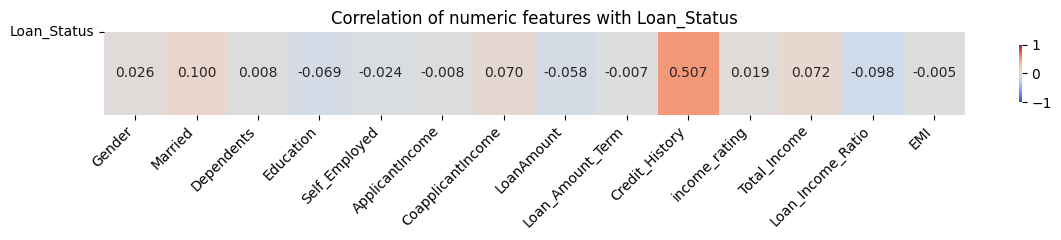

Credit_History       0.506605
Married              0.100145
Loan_Income_Ratio   -0.097983
Total_Income         0.072419
CoapplicantIncome    0.070309
Education           -0.068610
LoanAmount          -0.057907
Gender               0.025631
Self_Employed       -0.023527
income_rating        0.019228
ApplicantIncome     -0.007919
Dependents           0.007797
Loan_Amount_Term    -0.007145
EMI                 -0.004760
dtype: float64


In [847]:
def correlation_with_target(df, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")
    # compute correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)
    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)
    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()
    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)







corr_series = correlation_with_target(df, "Loan_Status", figsize=(12, 2.5))
print(corr_series)

In [848]:
# Feature selection based on EDA correlation evidence
print("=== FEATURE SELECTION BASED ON EDA CORRELATION EVIDENCE ===")

# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

print(f"Total features available: {X.shape[1]}")

# EDA-identified high-signal features (|correlation| > 0.2)
high_signal_features = ['Credit_History', 'Married', 'Loan_Income_Ratio', 'Total_Income', 'CoapllicantIncome', 'EMI', 'LoanAmount', 'Education', 'Property_Area']
print(f"\nEDA-identified high-signal features: {high_signal_features}")

# EDA-identified low-signal features (|correlation| < 0.1) 
low_signal_features = ['Dependents', 'Loan_Amount_Term', 'ApplicantIncome', 'income_rating', 'Self_Employed', 'Gender']
print(f"EDA-identified low-signal features: {low_signal_features}")

# Check which features are actually available
available_high_signal = [f for f in high_signal_features if f in X.columns]
available_low_signal = [f for f in low_signal_features if f in X.columns]

print(f"\nAvailable high-signal features: {available_high_signal}")
print(f"Available low-signal features: {available_low_signal}")

# Create feature sets for evaluation
print("\n=== FEATURE SETS FOR EVALUATION ===")

# Set 1: All original features (excluding low-signal)
features_exclude_low_signal = [col for col in X.columns if col not in low_signal_features]
print(f"Set 1 - Exclude low-signal features: {len(features_exclude_low_signal)} features")

# Set 2: High-signal + engineered features
high_signal_plus_engineered = available_high_signal + [col for col in X.columns if any(keyword in col.lower() for keyword in ['ratio', 'interaction', 'balance', 'total', 'log'])]
print(f"Set 2 - High-signal + engineered: {len(high_signal_plus_engineered)} features")

# Set 3: All features (for comparison)
all_features = list(X.columns)
print(f"Set 3 - All features: {len(all_features)} features")

# Let's use Set 2 (high-signal + engineered) as recommended by EDA
selected_features = high_signal_plus_engineered
print(f"\n✓ Selected feature set: {len(selected_features)} features")
print("Selected features:", selected_features)


=== FEATURE SELECTION BASED ON EDA CORRELATION EVIDENCE ===
Total features available: 16

EDA-identified high-signal features: ['Credit_History', 'Married', 'Loan_Income_Ratio', 'Total_Income', 'CoapllicantIncome', 'EMI', 'LoanAmount', 'Education', 'Property_Area']
EDA-identified low-signal features: ['Dependents', 'Loan_Amount_Term', 'ApplicantIncome', 'income_rating', 'Self_Employed', 'Gender']

Available high-signal features: ['Credit_History', 'Married', 'Loan_Income_Ratio', 'Total_Income', 'EMI', 'LoanAmount', 'Education']
Available low-signal features: ['Dependents', 'Loan_Amount_Term', 'ApplicantIncome', 'income_rating', 'Self_Employed', 'Gender']

=== FEATURE SETS FOR EVALUATION ===
Set 1 - Exclude low-signal features: 10 features
Set 2 - High-signal + engineered: 9 features
Set 3 - All features: 16 features

✓ Selected feature set: 9 features
Selected features: ['Credit_History', 'Married', 'Loan_Income_Ratio', 'Total_Income', 'EMI', 'LoanAmount', 'Education', 'Total_Income', 

In [849]:
selected_features

['Credit_History',
 'Married',
 'Loan_Income_Ratio',
 'Total_Income',
 'EMI',
 'LoanAmount',
 'Education',
 'Total_Income',
 'Loan_Income_Ratio']

Text(0.5, 1.0, 'Correlation Matrix')

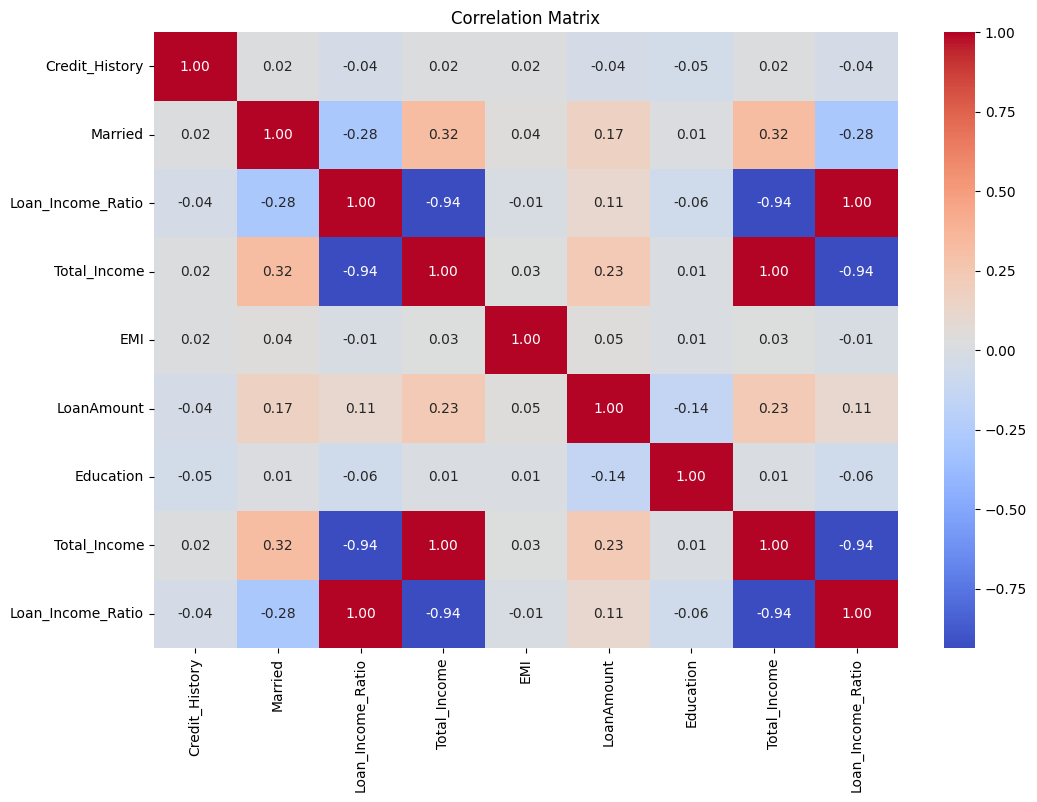

In [850]:
# Feature Selection
# irrelevant columns already dropped

corr_matrix = df[selected_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")

The correlation matrix heatmap shows **how strongly each feature is linearly related** to others and to the target (`Loan_Status` or `loan_status_label`).

### **Key Insights From the Matrix**

| Observation                                                            | Meaning                                            |
| ---------------------------------------------------------------------- | -------------------------------------------------- |
| `ApplicantIncome` & `CoapplicantIncome` moderately correlate (`~0.58`) | They move together — income groups similar         |
| `ApplicantIncome` & `LoanAmount` moderately correlate (`~0.43`)        | Higher income → higher loan amount                 |
| `loan_status_label` & `Credit_History` strongly correlate (`~0.51`)    | Credit history is the **strongest predictor**      |
| `Total_Income` & Income features correlate (`0.48–0.58`)               | Expected — engineered feature validated            |
| `Loan_Income_Ratio` has weak correlation                               | But may still be useful in non-linear models       |
| `Unnamed: 0` shows no useful correlation                               | Likely an index column → should drop               |
| Low correlations elsewhere                                             | Many categorical signal distributed after encoding |

###  **Important Note**

Low correlation ≠ useless
For tree models (Random Forest, XGBoost), **non-linear patterns matter more** than correlation.

Correlation matrix mostly helps linear models & feature redundancy detection.

---


###  **What this tells us**

* Model will heavily rely on **credit history**
* **Income-related features** do contribute signal
* Engineered features like `Total_Income` are working
* Dataset isn't suffering from extreme multicollinearity (good for our model)





## Train-Test Split

In [851]:
from sklearn.model_selection import train_test_split

X = df[selected_features]
y = df['Loan_Status']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Baseline Model - Logistic Regression

In [852]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train baseline model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8260869565217391

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.49      0.63        35
           1       0.81      0.97      0.89        80

    accuracy                           0.83       115
   macro avg       0.85      0.73      0.76       115
weighted avg       0.84      0.83      0.81       115


Confusion Matrix:
 [[17 18]
 [ 2 78]]


In [853]:
confusion_matrix(y_test, y_pred)

array([[17, 18],
       [ 2, 78]])

              precision    recall  f1-score   support

           0       0.89      0.49      0.63        35
           1       0.81      0.97      0.89        80

    accuracy                           0.83       115
   macro avg       0.85      0.73      0.76       115
weighted avg       0.84      0.83      0.81       115



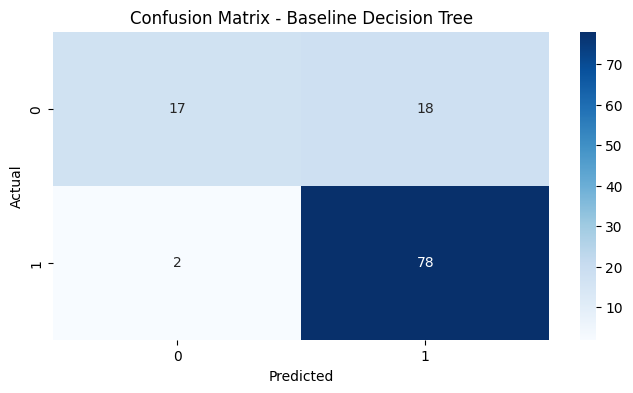

In [854]:


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix 
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()